In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

from sklearn.linear_model import LinearRegression

In [2]:
train = pd.read_csv("reg1_train.csv")
test = pd.read_csv("reg1_test.csv")

In [3]:
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [5]:
train.dropna(inplace = True)

In [6]:
train.isnull().sum().sum()

0

In [7]:
test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


## visualize

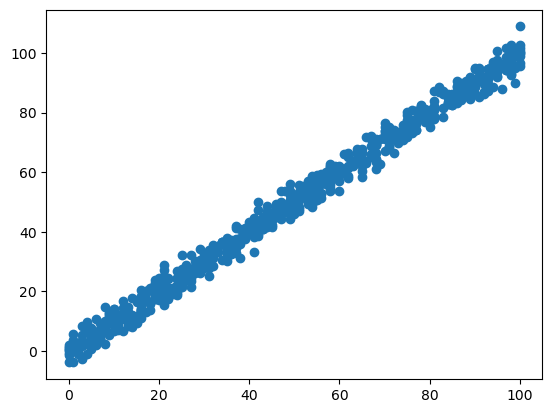

In [9]:
plt.scatter(train['x'],train['y'])


----------------
## Split the data

In [10]:
x_train = train.iloc[:,:-1].values
y_train = train.iloc[:,-1].values
x_test = test.iloc[:,:-1].values
y_test = test.iloc[:,-1].values

## create the model and trian it 

In [11]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [12]:
y_pred = model.predict(x_test)

In [13]:
y_test

array([ 79.77515201,  23.17727887,  25.60926156,  17.85738813,
        41.84986439,   9.80523488,  58.87465933,  97.61793701,
        18.39512747,   8.74674765,   2.81141583,  17.09537241,
        95.14907176,  61.38800663,  40.24701716,  14.82248589,
        66.95806869,  16.63507984,  90.65513736,  77.22982636,
        92.11906278,  46.91387709,  89.82634442,  21.71380347,
        97.41206981,  57.01631363,  78.31056542,  19.1315097 ,
        93.03483388,  26.59112396,  97.55155344,  31.43524822,
        35.12724777,  78.61042432,  33.07112825,  51.69967172,
        53.62235225,  69.46306072,  27.42497237,  36.34644189,
        95.06140858,  68.16724757,  50.96155532,  78.04237454,
         5.60766487,  36.11334779,  67.2352155 ,  65.01324035,
        38.14753871,  34.31141446,  95.28503937,  87.84749912,
        54.08170635,  31.93063515,  59.61247085,  -1.04011421,
        47.49374765,  62.60089773,  70.9146434 ,  56.14834113,
        14.05572877,  68.11367147,  75.59701346,  59.22

In [22]:
y_pred

array([76.94327594, 20.90651855, 21.90717494, 19.90586217, 35.91636428,
       14.90258026, 61.93343021, 94.95509081, 19.90586217,  4.89601644,
        3.89536006, 18.90520579, 95.95574719, 61.93343021, 35.91636428,
       14.90258026, 64.93539936, 13.90192388, 86.94983976, 68.93802488,
       88.95115252, 50.92621001, 88.95115252, 26.91045685, 96.95640358,
       57.93080468, 78.9445887 , 20.90651855, 92.95377805, 26.91045685,
       98.95771634, 30.91308237, 32.91439514, 79.94524508, 27.91111323,
       46.92358448, 52.92752277, 68.93802488, 27.91111323, 32.91439514,
       90.95246528, 70.93933765, 49.92555363, 75.94261956,  3.89536006,
       36.91702066, 69.93868127, 67.9373685 , 39.91898981, 34.9157079 ,
       93.95443443, 87.95049614, 51.92686639, 30.91308237, 58.93146107,
       -0.10726546, 38.91833343, 63.93474297, 68.93802488, 56.9301483 ,
       12.9012675 , 71.93999403, 75.94261956, 60.93277383, 81.94655785,
       17.90454941, 40.91964619, 49.92555363, 54.92883554, 12.90

In [14]:
model.coef_

array([1.00065638])

In [15]:
model.intercept_

-0.10726546430097272

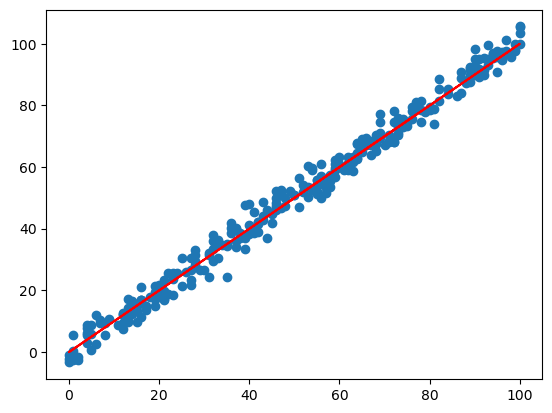

In [16]:
plt.scatter(x_test,y_test)
plt.plot(x_test.reshape(-1, 1),model.predict(x_test),color='red')

In [17]:
df = pd.DataFrame({'ACT':y_test.flatten(),'pred':y_pred.flatten()})
df.head()

,ACT,pred
0,79.775152,76.943276
1,23.177279,20.906519
2,25.609262,21.907175
3,17.857388,19.905862
4,41.849864,35.916364


<AxesSubplot:>

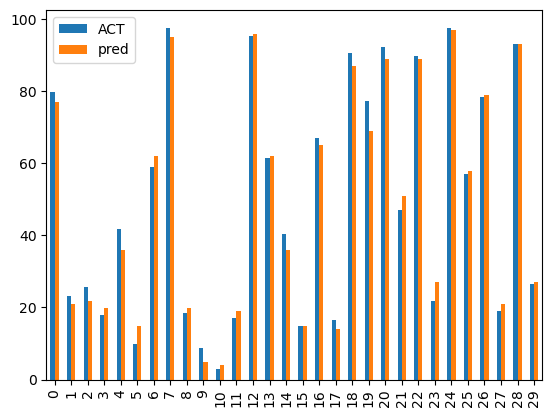

In [18]:
df.head(30).plot(kind='bar')

## build with statsmodel

In [19]:
import statsmodels.api as sm

In [20]:
x_stat = sm.add_constant(x_train)
model2 = sm.OLS(y_train,x_stat).fit()

In [21]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 7.426e+04
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:08:29   Log-Likelihood:                -1712.8
No. Observations:                 699   AIC:                             3430.
Df Residuals:                     697   BIC:                             3439.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1073      0.212     -0.506      0.613      -0.524       0.309
x1             1.0007      0.004    272.510      0.000       0.993       1.008
==============================================================================
Omnibus:                        0.170   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.919   Jarque-Bera (JB):                0.216
Skew:                           0.036   Prob(JB):                        0.898
Kurtosis:                       2.952   Cond. No.                         115.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""